In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
from data import load_data

(x_train, y_train), (x_test, y_test) = load_data()

SGD

In [3]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [4]:
scores = sgd_model.decision_function(x_train[:5])
predict = sgd_model.predict(x_train[:5])

print("Scores: {}".format(scores))
print("Predict: {}".format(predict))
print("Label: {}".format(y_train[:5]))

Scores: [[-473897.80801197 -644255.86485802 -347352.99430408  -30942.4528106
  -560971.15600433  -42695.14872161 -495355.44702264 -327659.64997194
  -485909.1798798  -495629.95766748]
 [ 299710.21061928 -718019.09995182 -338827.98259308 -299430.08898213
  -531693.55043089 -386004.32915076 -545322.92199764 -521945.71072296
  -456686.69076854 -407488.40237992]
 [-482153.35038918 -533046.39240131 -190089.48180073 -150059.92496167
    11950.34871824 -587473.70280316 -492066.0673237  -374210.20329604
  -521473.55052555 -353501.37916722]
 [-591440.62376883   69425.74205759  -53233.77796119 -133202.0284238
  -264386.81519259 -385956.12301055 -292795.13951332 -338264.17025273
   -96076.58907387 -349142.42780857]
 [-599588.59103781 -286441.9850777  -530623.53673113 -543537.2122616
  -131465.97492402 -379355.76885655 -323905.44220535 -119275.4360709
  -331176.24056772  165513.26872195]]
Predict: [3 0 4 1 9]
Label: [5 0 4 1 9]


In [5]:
from sklearn.multiclass import OneVsOneClassifier

ovo_model = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_model.fit(x_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=5,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=-inf, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [6]:
ovo_model.predict(x_train[:5])

array([5, 0, 4, 1, 4], dtype=int8)

Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [8]:
prob = forest_model.predict_proba(x_train[:5])
predict = forest_model.predict(x_train[:5])
print("prob: \n{}".format(prob))
print("predict: {}".format(predict))

prob: 
[[0.  0.  0.  0.2 0.  0.8 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.9 0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]
predict: [5 0 4 1 9]


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

sgd_model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
cross_val_score(sgd_model, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90461908, 0.90654533, 0.91273691])

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_model, x_train_scaled, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[5717    2   28   11   10   43   55    8   46    3]
 [   1 6462   42   27    6   38    9    9  136   12]
 [  57   38 5315   94   89   30  112   53  154   16]
 [  46   45  139 5326    4  237   42   61  133   98]
 [  18   21   36    9 5360    8   56   30   94  210]
 [  80   39   37  180   85 4594  114   26  168   98]
 [  30   24   39    2   40   97 5635    4   47    0]
 [  25   26   67   30   58   10    4 5792   19  234]
 [  52  145   72  160   14  161   56   25 5022  144]
 [  40   32   30   91  174   30    2  214   81 5255]]


<Figure size 432x288 with 0 Axes>

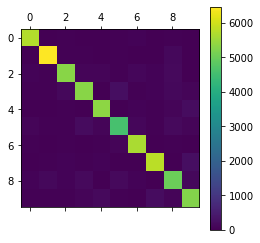

In [11]:
plt.figure()
plt.matshow(cm)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

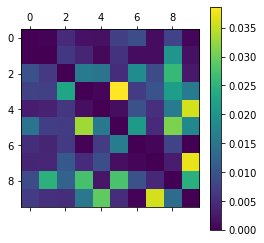

In [12]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.figure()
plt.matshow(norm_conf_mx)
plt.colorbar()
plt.show()

In [13]:
cl_a, cl_b = 3, 5
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [14]:
import math

def plot_images(data, ncols=3):
    nrows = math.ceil(len(data) / ncols)
    full_images = []
    for row in range(nrows):
        row_images = [image.reshape(28, 28) for image in data[row*ncols:(row+1)*ncols]]
        row_concat = np.concatenate(row_images, axis=1)
        full_images.append(row_concat)
    full_concat = np.concatenate(full_images, axis=0)
    plt.imshow(full_concat, cmap='binary')
    plt.axis('off')

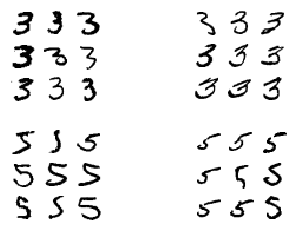

In [15]:
plt.subplot(2, 2, 1)
plot_images(x_aa[:9])
plt.subplot(2, 2, 2)
plot_images(x_ab[:9])
plt.subplot(2, 2, 3)
plot_images(x_ba[:9])
plt.subplot(2, 2, 4)
plot_images(x_bb[:9])